In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from surprise import KNNBasic, SVD, NormalPredictor, KNNBaseline,KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, Reader, dataset, accuracy

In [4]:
columns = ['userID', 'productID', 'ratings','timestamp']

recomm_df = pd.read_csv(r"C:\Users\HP\Downloads/ratings_Electronics.csv",names=columns)

In [5]:
recomm_df.info()
recomm_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userID     object 
 1   productID  object 
 2   ratings    float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


,userID,productID,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [6]:
recomm_df.shape

(7824482, 4)

In [7]:
recomm_df.describe()

,ratings,timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [8]:
recomm_df = recomm_df.drop('timestamp', axis=1)

In [9]:
recomm_df.isna().sum()

userID       0
productID    0
ratings      0
dtype: int64

In [10]:
recomm_df.shape

(7824482, 3)

array([[<AxesSubplot:title={'center':'ratings'}>]], dtype=object)

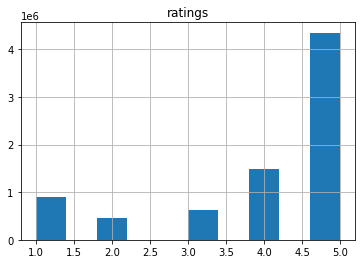

In [11]:
recomm_df.hist('ratings',bins = 10)

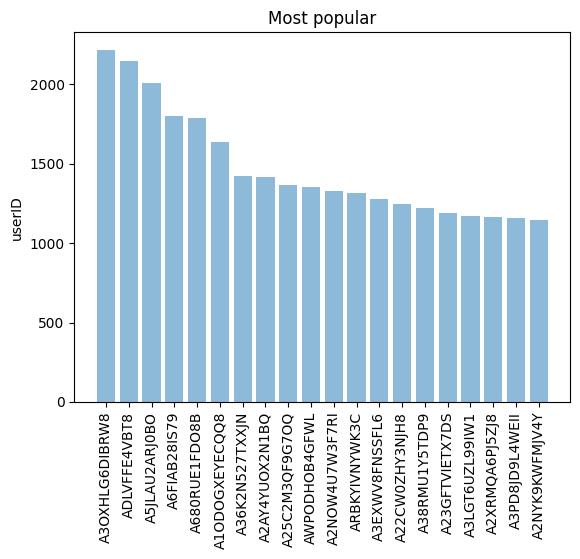

In [12]:
popular = recomm_df[['userID','ratings']].groupby('userID').sum().reset_index()
popular_20 = popular.sort_values('ratings', ascending=False).head(n=20)
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = (list(popular_20['userID']))
y_pos = np.arange(len(objects))
performance = list(popular_20['ratings'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('userID')
plt.title('Most popular')
 
plt.show()

In [13]:
recomm_df.userID.value_counts()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A2L5CYN2Y8AIQJ      1
A3N825ZWZGR85       1
A1E9LNH1V0BQVE      1
A28Z214PBUV59C      1
A3B78MGOREIOWS      1
Name: userID, Length: 4201696, dtype: int64

In [14]:

print('Number of unique users', len(recomm_df['userID'].unique()))

Number of unique users 4201696


In [15]:
print('Number of unique products', len(recomm_df['productID'].unique()))

Number of unique products 476002


In [16]:
print('Unique Ratings', recomm_df['ratings'].unique())

Unique Ratings [5. 1. 3. 2. 4.]


In [17]:
min_ratings1 = recomm_df[(recomm_df['ratings'] < 2.0)]

In [18]:
print('Number of unique products rated low',len(min_ratings1['productID'].unique()))

Number of unique products rated low 176283


In [19]:
med_ratings1 = recomm_df[(recomm_df['ratings'] > 2.0) & (recomm_df['ratings'] < 4.0)]

In [20]:
print('Number of unique products rated medium',len(med_ratings1['productID'].unique()))

Number of unique products rated medium 152827


In [21]:
max_ratings1 = recomm_df[recomm_df['ratings'] >= 4.0]

In [22]:
print('Number of unique products rated high',len(max_ratings1['productID'].unique()))

Number of unique products rated high 410110


In [23]:
avg_rating_prod = recomm_df.groupby('productID').sum() / recomm_df.groupby('productID').count()

In [24]:
avg_rating_prod.drop('userID', axis=1,inplace =True)

In [25]:
print ('Top 10 highly rated products \n',avg_rating_prod.nlargest(10,'ratings'))

Top 10 highly rated products 
             ratings
productID          
0132793040      5.0
0321732944      5.0
059400232X      5.0
0594033934      5.0
0594287995      5.0
0594450209      5.0
0594450705      5.0
0594511488      5.0
0594514789      5.0
0594549558      5.0


In [26]:
userID = recomm_df.groupby('userID').count()

In [27]:

top_user = userID[userID['ratings'] >= 50].index

In [28]:
topuser_ratings_df = recomm_df[recomm_df['userID'].isin(top_user)]

In [29]:

topuser_ratings_df.shape

(125871, 3)

In [30]:
topuser_ratings_df.head()

,userID,productID,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


In [35]:
topuser_ratings_df.sort_values(by='ratings', ascending=False).head()


,userID,productID,ratings
94,A3BY5KCNQZXV5U,0594451647,5.0
4256669,A680RUE1FDO8B,B004M8RWDE,5.0
4258497,AOMEH9W6LHC4S,B004M8SBNE,5.0
4258199,A2GKMXRLI7KLFP,B004M8SBD4,5.0
4258099,A1UNJ46NSB352E,B004M8SBCK,5.0


In [36]:
prodID = recomm_df.groupby('productID').count()


In [37]:
top_prod = prodID[prodID['ratings'] >= 50].index


In [38]:
top_ratings_df = topuser_ratings_df[topuser_ratings_df['productID'].isin(top_prod)]


In [39]:
top_ratings_df.sort_values(by='ratings', ascending=False).head()


,userID,productID,ratings
492,A3CLWR1UUZT6TG,0972683275,5.0
4220481,A2AY4YUOX2N1BQ,B004KJE8FU,5.0
4217715,A2Q204DY2L7YRP,B004K8WPUQ,5.0
4218748,A87CILADRIZW0,B004KA8Y4U,5.0
4219205,A11KZ906QD08C5,B004KCI80I,5.0


In [40]:
top_ratings_df.shape


(79182, 3)

In [41]:

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(top_ratings_df, test_size = 0.30, random_state=0)

In [42]:
train_data.head()


,userID,productID,ratings
3679937,A2W0XCWOK3MW6F,B003Y74AXO,3.0
3603561,A2E1EFNIZL2FVA,B003VANO7C,5.0
6945634,AR3EVUQF0AC7R,B00ARB5FLQ,4.0
2732999,A38RMU1Y5TDP9,B002NGVY8G,1.0
7715921,A1JZFGZEZVWQPY,B00GRNUO2I,3.0


In [43]:
test_data.head()


,userID,productID,ratings
6562653,AWH2AY17ZU7W2,B009A6CZ30,5.0
1001830,A1SHHQSPOWR00F,B000HGIWN4,3.0
3904732,A1PVJICI412IN4,B00466X9SY,5.0
7600678,AGYH5U11ZKPFB,B00F3ZN0CC,4.0
2743475,AMKNPIDFLRFMP,B002O3W2OI,2.0


In [44]:
train_data_grouped = train_data.groupby('productID').mean().reset_index()

In [45]:
train_data_grouped.head()


,productID,ratings
0,0972683275,4.5
1,1400501466,3.0
2,1400501520,5.0
3,1400501776,4.0
4,1400532620,1.0


In [46]:
train_data_sort = train_data_grouped.sort_values(['ratings', 'productID'], ascending=False)

In [47]:
train_data_sort.head()


,productID,ratings
14854,B00L3YHF6O,5.0
14851,B00K7O2DJU,5.0
14850,B00K4VQZCM,5.0
14849,B00K0OBEE2,5.0
14845,B00JLADOGW,5.0


In [48]:
train_data.groupby('productID')['ratings'].count().sort_values(ascending=False).head(10)


productID
B0088CJT4U    135
B003ES5ZUU    128
B007WTAJTO    123
B000N99BBC    122
B00829TIEK    102
B008DWCRQW    102
B00829THK0     98
B002R5AM7C     94
B004CLYEDC     82
B004CLYEFK     76
Name: ratings, dtype: int64

In [49]:
ratings_mean_count = pd.DataFrame(train_data.groupby('productID')['ratings'].mean())

In [50]:
ratings_mean_count['rating_counts'] = pd.DataFrame(train_data.groupby('productID')['ratings'].count())

In [51]:
ratings_mean_count.head()


,ratings,rating_counts
productID,,
0972683275,4.5,2
1400501466,3.0,4
1400501520,5.0,1
1400501776,4.0,1
1400532620,1.0,1


In [52]:
pred_df = test_data[['userID', 'productID', 'ratings']]


In [53]:
pred_df.rename(columns = {'ratings' : 'true_ratings'}, inplace=True)


In [54]:
pred_df = pred_df.merge(train_data_sort, left_on='productID', right_on = 'productID')


In [55]:
pred_df.head(3)


,userID,productID,true_ratings,ratings
0,AWH2AY17ZU7W2,B009A6CZ30,5.0,4.5
1,A316XO4RWX21YN,B009A6CZ30,4.0,4.5
2,A1UNJ46NSB352E,B009A6CZ30,5.0,4.5


In [56]:
pred_df.rename(columns = {'ratings' : 'predicted_ratings'}, inplace = True)


In [57]:
pred_df.head()


,userID,productID,true_ratings,predicted_ratings
0,AWH2AY17ZU7W2,B009A6CZ30,5.0,4.5
1,A316XO4RWX21YN,B009A6CZ30,4.0,4.5
2,A1UNJ46NSB352E,B009A6CZ30,5.0,4.5
3,A1CMD08Z49PGKQ,B009A6CZ30,5.0,4.5
4,A1F9Z42CFF9IAY,B009A6CZ30,5.0,4.5


In [58]:
import sklearn.metrics as metric
from math import sqrt
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.0914119718039657


In [59]:

import surprise
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [60]:
reader = Reader(rating_scale=(0.5, 5.0))


In [61]:
data = Dataset.load_from_df(top_ratings_df[['userID', 'productID', 'ratings']],reader)


In [62]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.3,random_state=0)

In [63]:
type(trainset)


surprise.trainset.Trainset

In [64]:
algo_user = KNNWithMeans(k=10, min_k=6, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo_user.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [65]:
svd_model = SVD(n_factors=50,reg_all=0.02)
svd_model.fit(trainset)

In [66]:
MSE = metric.mean_squared_error(pred_df['true_ratings'], pred_df['predicted_ratings'])
print('The RMSE value for Popularity Recommender model is', sqrt(MSE))

The RMSE value for Popularity Recommender model is 1.0914119718039657


In [67]:
print(len(testset))
type(testset)

23755


list

In [68]:
test_pred = algo_user.test(testset)
test_pred[0]

Prediction(uid='A28UMA3GW9L124', iid='B001GX6MJ8', r_ui=3.0, est=3.3492063492063493, details={'actual_k': 2, 'was_impossible': False})

In [69]:
accuracy.rmse(test_pred)

RMSE: 0.9941


0.9940800621800723

In [70]:
test_pred = svd_model.test(testset)

In [71]:
accuracy.rmse(test_pred)

RMSE: 0.9604


0.9603504511642099

In [72]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_factors' : [5,10,15], "reg_all":[0.01,0.02]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3,refit = True)

In [73]:
gs.fit(data)

In [74]:
gs.best_params

{'rmse': {'n_factors': 5, 'reg_all': 0.01}}

In [75]:
gs.test(testset)
accuracy.rmse(gs.test(testset))

RMSE: 0.8564


0.8563731076587486

In [76]:
from collections import defaultdict
def get_top_n(predictions, n=5):
  
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [77]:
top_n = get_top_n(test_pred, n=5)

In [78]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A28UMA3GW9L124 ['B008JJLW4M', 'B000N99BBC', 'B00HFRWWAM', 'B00634PLTW', 'B002IO2UM2']
A38NHXL5257E3B ['B00BOHNYU6', 'B00CB2F65O', 'B003SGCO3E', 'B004GUT1QO', 'B004Q3R9AQ']
A36IHC0K68NS2 ['B00HMREOLK', 'B0041RRRUE', 'B004ING996', 'B00ATM1MGA', 'B00724X77A']
A231WM2Z2JL0U3 ['B00008OE6I', 'B00000JSGF', 'B00004RC2D', 'B00006412G', 'B00005QJCU']
A2AC6GQ24S45GA ['B009E6J1BU', 'B000PGHCG4', 'B0042TS7GE', 'B001S2RCWI', 'B001TOD7ME']
A3OXHLG6DIBRW8 ['B001T9NUJE', 'B004CLYEFK', 'B0000510ZO', 'B000GG5LUW', 'B002VPE1X4']
A2XA8CW5DF4MNZ ['B000TKHBDK', 'B001TOD7ME', 'B005BCCML2', 'B000MKKTJK', 'B000AP05BO']
AG35JCCQWDRCS ['B0036Q7MV0', 'B000068O16', 'B0045TYDNC', 'B003ZSHNE0', 'B001MSVPM6']
A2X3L31KCXBHCL ['B00829THEG', 'B003VNKKT4', 'B006WHPQE0', 'B00DQZQ5T6', 'B000B63KSM']
A33YZNZIRA3H97 ['B00BOHNYTW', 'B00HFRWWAM', 'B00006I5J7', 'B00E8CF0CE', 'B00AXTQQDS']
AX05DBU8IRUWY ['B006W8U2MU', 'B007WTAJTO', 'B001L1H0SC', 'B00FISD9DO', 'B008D6YZXG']
A296QED1MV1V0J ['B0058G40O8', 'B008AST7R6', 'B00CFCTDMC',

A38V76R24EJSHA ['B000WH6H1M', 'B00713DPM4', 'B007MW13PA', 'B00HQZGZ38', 'B0026IBI1O']
ABE5E8B3J7MKY ['B0019EHU8G', 'B000QUUFRW', 'B00006B81E', 'B003UI62AG', 'B007R5YGO2']
A23WPWLYT3P1CZ ['B002UVNW5W', 'B008OHNZI0', 'B002MCZJ78', 'B001F7AJKI', 'B005FYCFG8']
A25FL6VLD7S23S ['B001144JQU', 'B00180LGX6', 'B00D429Y12', 'B004BLK24S', 'B001F51G16']
A233TZONT1OGR0 ['B00005T3G0', 'B0001XGQTA', 'B000OG88KY', 'B000MBUSD6', 'B003P2V52M']
AQ2FC1DLKVD8H ['B0061HMRA2', 'B00006RVPW', 'B002WE4HE2', 'B0002J2TLC', 'B00EH5UGR6']
A2QNS95WGN35G9 ['B003WUBIZQ', 'B0013FLTNS', 'B0036WT4EW', 'B000JLK5PK', 'B002J9HCV0']
A2FWZ58M6IQMD7 ['B007R5YDYA', 'B000N99BBC', 'B004XC6GJ0', 'B00FW6T36Y', 'B000VVVMQY']
A1R377IPZOKLMM ['B00007IFED', 'B008HK3QII', 'B003XDU2Y0', 'B002K9IHGI', 'B0088CJT4U']
A1IG1I6MR3HAWA ['B00316263Y', 'B001QUA6R0', 'B002HWRJY4', 'B000U5TUWE', 'B0001VQEYY']
AUITG1DJ3QUGK ['B003LPTAYI', 'B00829TIEK', 'B004HO59M4', 'B00ATE7SZM', 'B0058UUR6E']
A2NLI1M5K2MQ5E ['B00AAIPT76', 'B003WGNSTE', 'B00FRHTSMW',

A3JAH5WW61N2EK ['B008TYKEWS', 'B0016P5ASK', 'B001CCAISE', 'B001EYV9TM', 'B008OHRJ32']
A2DXENZNO2JT4F ['B00BOHNYTW', 'B00CI3BIWQ', 'B007PTCFFW', 'B007ABIY4Q', 'B00CRJWW2G']
ARXU3FESTWMJJ ['B000053HC5', 'B00D6XW62I', 'B001P05NBA', 'B000M5U9GI', 'B009WG6JF8']
A3V6QSTG2T9MIO ['B006W8U2MU', 'B004CLYEDC', 'B00067LYFW', 'B0058SRNZ4', 'B001D60LG8']
A2JCJJNY43QQIV ['B005SNPTRS', 'B001HSOFI2', 'B000ETY3LO', 'B0015EWMX8', 'B00A3YN0Z0']
A1CMD08Z49PGKQ ['B0015EA3NO', 'B004286VMW', 'B004XC6GJ0', 'B007R5YDYA', 'B003WUBIZQ']
A24J2Y1O22JYZX ['B00077AA5Q', 'B001HBHLEY', 'B00AEMGGU2', 'B0036WT1RW', 'B001GAOYCI']
A2WYF4POBUXL2O ['B001ENW61I', 'B0013AV4M4', 'B000MSDL6K', 'B000BYCKU8', 'B0000BZLBA']
ABMNX856X89CS ['B00IVFDZBC', 'B001FWBUUG', 'B001VZ1W5U', 'B008DWCRQW', 'B0079TOI8K']
A2TMFC9O3ZCNKE ['B003ES5ZUU', 'B002S53LJ2', 'B00609B3J2', 'B001W28L2Y', 'B001GGL7Z4']
A27QXQQOLAMRRR ['B003L1ZYZ6', 'B001TUYTZM', 'B002K9IHGI', 'B00HVT27B8', 'B00829TIEK']
A16SRDVPBXN69C ['B00007GQLS', 'B000I1X3W8', 'B000YBH4YU'

A2D1ZQEFS1NBH2 ['B000E6G9RI', 'B005J2E2US', 'B008GVM9K4', 'B0096T97OG', 'B003B3P2CY']
A3NVZTGPORNPRW ['B004S4R5CK', 'B002QAUN2M', 'B003VAK16O', 'B001QUA6R0', 'B0055D66V4']
A28X0LT2100RL1 ['B002WE4HE2', 'B001TH7GUU', 'B003ES5ZSW', 'B00009R9A1', 'B008GGH4FY']
AELK0E5DK7LIZ ['B005KAK2FI', 'B006EKIQYM', 'B00COF7DGS', 'B00BOHNYU6', 'B0034CL2ZI']
A10X9ME6R66JDX ['B002YU83YO', 'B0052SCU8U', 'B002V88HFE', 'B0012GK3MQ', 'B00483WRZ6']
A7EU2BWLLCJY2 ['B003FMUMN0', 'B00FSA8VQ2', 'B000U92DLA', 'B000HDJT4S', 'B003UE52ME']
A3PGVJF37JSHFO ['B001V9KG0I', 'B005LDLP8W', 'B00029U1DK', 'B00A9NE84C', 'B0054LK280']
A2XJMQ2COPGWJH ['B0019EHU8G', 'B0000B006W', 'B0025VKUPW', 'B000J1F1BI', 'B001NPEBEC']
A38QEATH3NODFM ['B000204SWE', 'B000BONJXU', 'B00142MUEM', 'B000BT2PZS', 'B000LD14PQ']
A2LB4FLRZG6CUV ['B00BQ4F9ZA', 'B001MSVPM6', 'B00426C57O', 'B0077CR5RK', 'B005CLPP8E']
AD9ZL63H0VKCZ ['B00APQA572', 'B003UOIMAS', 'B003XCDA9A', 'B0074BW614', 'B005RG99OU']
ALUNVOQRXOZIA ['B002TLTG9E', 'B001D8S9E2', 'B0017ZG538', 

A19RGDJPNZ7NZ ['B006EKIQYM', 'B00CDS9HTM', 'B00FFJ0HUE', 'B000MUXJCO', 'B0049SCB2Y']
AYO1146CBIV5C ['B001S4OTS6', 'B00AWRPIWQ', 'B005BCCML2', 'B008X9Z8NE', 'B008ULPE70']
A19XPAWSWDRI3B ['B002QUZM0U', 'B00066FH1U', 'B000P5AJXI', 'B001KB21KA', 'B0039BPG1A']
A3HQAPXAJV7PRX ['B005QBK5V2', 'B003BLQHN4', 'B00CD8ADKO', 'B005GVAWXS', 'B000GABCY2']
A2O6HZ2B9YSRXR ['B001TH7T2U', 'B0036Q7MV0', 'B000HPV3RW', 'B002TQYUAE', 'B003NREDC8']
AI8EMB0HUC6Z5 ['B001TH7GUU', 'B0019EHU8G', 'B000N99BBC', 'B003ES5ZUU', 'B003CFATT2']
A2U3OEIK1CUPIK ['B001AW8W7A', 'B009IZ82DA', 'B00012FVYC', 'B000UPJR4A', 'B000W2MW7U']
A12ANFNOSMW5VD ['B0034CL2ZI', 'B008F4NL04', 'B0068ZWZY0', 'B00634PLTW', 'B009VXUFLG']
A3PDWA32BAMB2Y ['B003MQWN40', 'B000Q8UAWY', 'B0002Y5WZC', 'B003CKC8W8', 'B00104XCVO']
A2WA8TDCTGUADI ['B003CFATT2', 'B004CLYEDC', 'B0015313Q6', 'B0057AVXP4', 'B003X26LXW']
A28J3123I1QDKI ['B00316263Y', 'B001TH7GUU', 'B005DKZTMG', 'B007IV7KRU', 'B005FYNSPK']
A19FRW264WZTGP ['B001T9NUJE', 'B004CLYEFK', 'B000QWEN5K',